In [337]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn.tree import DecisionTreeClassifier
import cv2

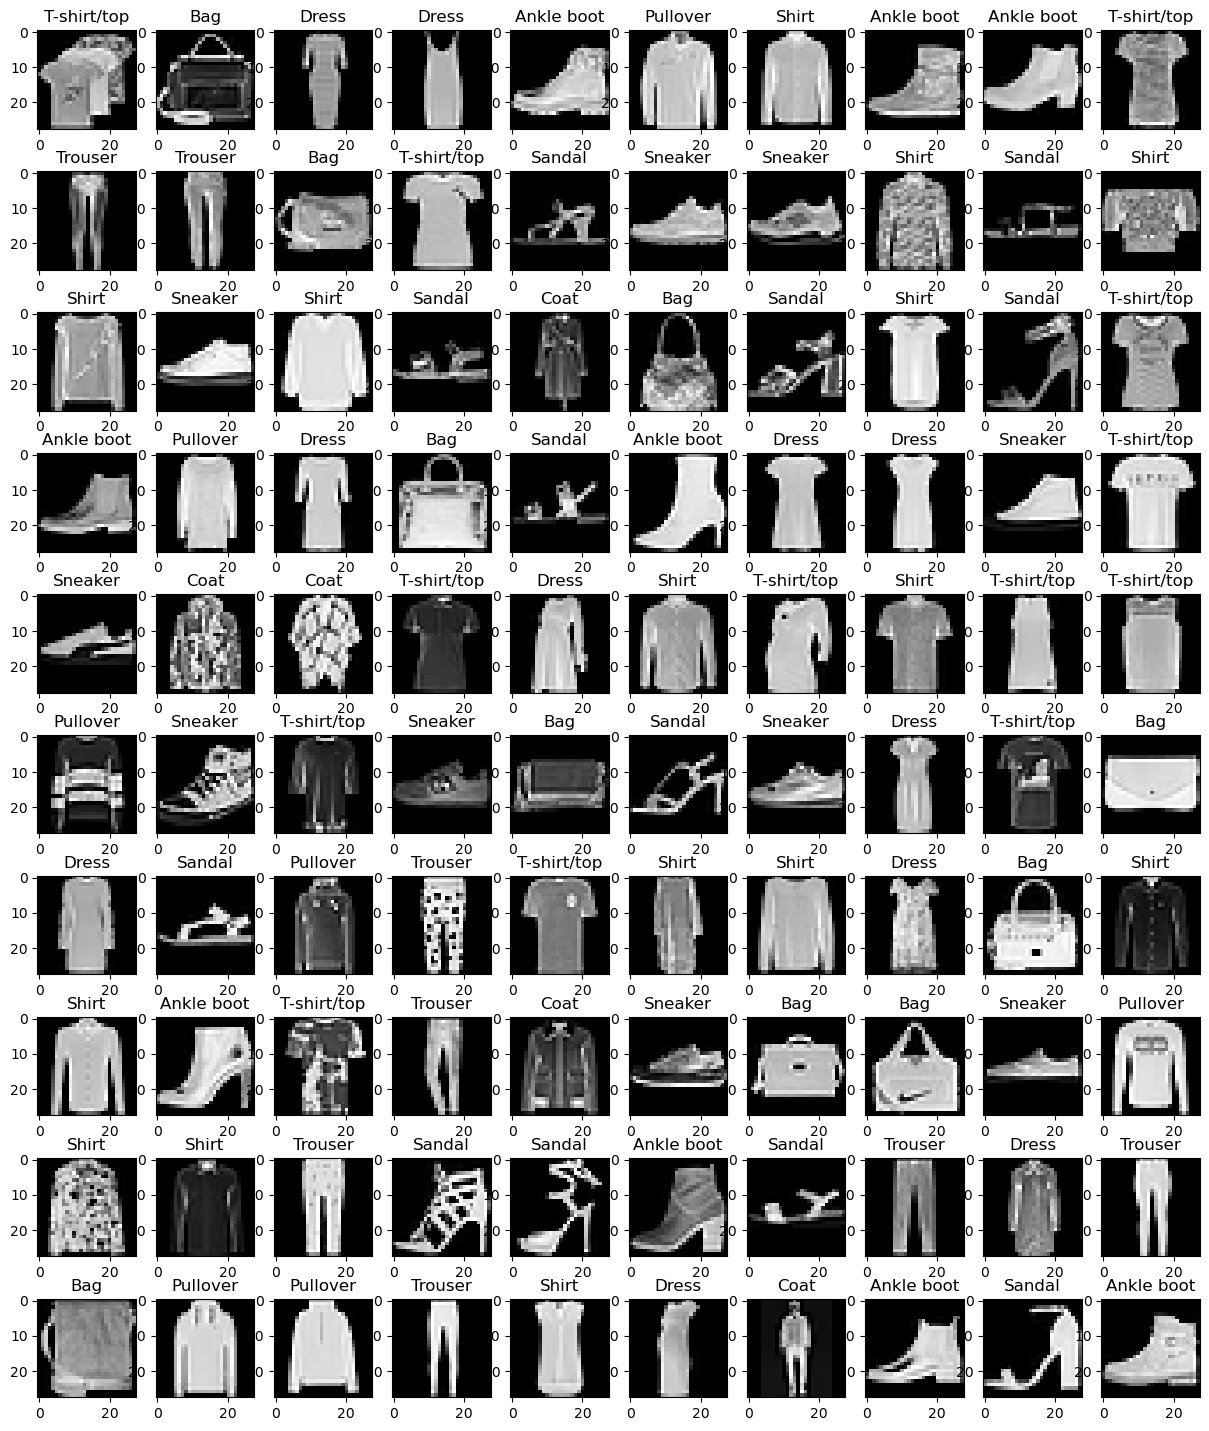

In [338]:
# 数据预处理
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])
# 加载数据训练集
trainset=torchvision.datasets.FashionMNIST(root='./data',train=True,download=False,transform=transform)
trainload=torch.utils.data.DataLoader(trainset,shuffle=True,batch_size=100,num_workers=0)
# 加载测试数据集
testset=torchvision.datasets.FashionMNIST(root='./data',train=False,download=False,transform=transform)
testload=torch.utils.data.DataLoader(testset,shuffle=True,batch_size=100,num_workers=0)

classes=('T-shirt/top', 'Trouser', 'Pullover', 'Dress','Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

# 数据获取迭代器
dataiter=iter(trainload)
imgs,labels=next(dataiter)
# 显示部分图像
row=10
column=10
pos=1
plt.figure(figsize=(15,18))
for i in range(row):
    for j in range(column):
        plt.subplot(row,column,pos)
        plt.imshow(imgs[pos-1].numpy().squeeze(),cmap='gray')
        plt.title(classes[labels[pos-1].item()])
        pos+=1

In [354]:
device=torch.device("cpu")
# 创建分类器
params = {
    'criterion': 'entropy',
    'splitter': 'random',
    'max_depth': 10,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'min_weight_fraction_leaf': 0.0,
    'max_features': 0.5,
    'random_state': None,
    'max_leaf_nodes': None,
    'min_impurity_decrease': 0.0,
    'class_weight': None,
}
clf=DecisionTreeClassifier(**params)


In [372]:
max_epoch = 10
x_train = []
y_train = []
for epoch in range(max_epoch):
    print(f'Iteration {epoch+1}/{max_epoch}')
    for i, data in enumerate(trainload,start=0):
            images, labels = data  # 获取训练集的批图像和标签
            # images变为列向量
            inputs = images.view(images.size(0), -1)
            inputs,labels=inputs.to(device),labels.to(device)
            #加入x_train和y_train
            x_train.append(inputs)
            y_train.append(labels)
            if i % 100 == 0:
                print(f'[{epoch+1}/{max_epoch} {i}/{len(trainload)}]')
x_train = torch.cat(x_train, dim=0).numpy()
y_train = torch.cat(y_train, dim=0).numpy()

Iteration 1/10
[1/10 0/600]
[1/10 100/600]
[1/10 200/600]
[1/10 300/600]
[1/10 400/600]
[1/10 500/600]
Iteration 2/10
[2/10 0/600]
[2/10 100/600]
[2/10 200/600]
[2/10 300/600]
[2/10 400/600]
[2/10 500/600]
Iteration 3/10
[3/10 0/600]
[3/10 100/600]
[3/10 200/600]
[3/10 300/600]
[3/10 400/600]
[3/10 500/600]
Iteration 4/10
[4/10 0/600]
[4/10 100/600]
[4/10 200/600]
[4/10 300/600]
[4/10 400/600]
[4/10 500/600]
Iteration 5/10
[5/10 0/600]
[5/10 100/600]
[5/10 200/600]
[5/10 300/600]
[5/10 400/600]
[5/10 500/600]
Iteration 6/10
[6/10 0/600]
[6/10 100/600]
[6/10 200/600]
[6/10 300/600]
[6/10 400/600]
[6/10 500/600]
Iteration 7/10
[7/10 0/600]
[7/10 100/600]
[7/10 200/600]
[7/10 300/600]
[7/10 400/600]
[7/10 500/600]
Iteration 8/10
[8/10 0/600]
[8/10 100/600]
[8/10 200/600]
[8/10 300/600]
[8/10 400/600]
[8/10 500/600]
Iteration 9/10
[9/10 0/600]
[9/10 100/600]
[9/10 200/600]
[9/10 300/600]
[9/10 400/600]
[9/10 500/600]
Iteration 10/10
[10/10 0/600]
[10/10 100/600]
[10/10 200/600]
[10/10 300/

In [356]:
print(f'x_train shape: {x_train.shape},y_train shape: {y_train.shape}')

x_train shape: (600000, 784),y_train shape: (600000,)


In [373]:
#训练模型
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features=0.5,
                       splitter='random')

In [374]:
y_pred = clf.predict(x_train)
y_train = y_train.astype(float)
y_pred = y_pred.astype(float)

In [375]:
loss = nn.CrossEntropyLoss()
running_loss = loss(torch.tensor(y_pred), torch.tensor(y_train))
print('loss: %.3f' %( running_loss/(len(y_train)*100)))

loss: 0.647


In [ ]:
params3={
    "C": 1.0,
    "kernel": "rbf",
    "degree": 3,
    "gamma": "scale",
    "coef0": 0.0,
    "shrinking": True,
    "probability": False,
    "tol": 0.001,
    "cache_size": 200,
    "class_weight": None,
    "verbose": False,
    "max_iter": -1,
    "decision_function_shape": "ovr",
    "break_ties": False,
    "random_state": None,
}

In [376]:

# Variables to keep track of correct predictions and total examples
correct = 0
total = 0
TN,TP,FN,FP=np.zeros(10),np.zeros(10),np.zeros(10),np.zeros(10)
# Disable gradient calculation
for data in testload:
    images, labels = data
    inputs = images.view(images.size(0), -1)
    inputs,labels=inputs.to(device),labels.to(device)
    labels = labels.numpy()
    predicted = clf.predict(inputs)
    '''
    Micro-averaging:对数据集中的每个样本进行统计
    把每个类别的TP、FP、TN、FN都累加起来,然后计算准确率、召回率、F1值
    TP:预测为正例的样本中，实际为正例的样本数
    FN:预测为负例的样本中,实际为正例的样本数
    FP:预测为正例的样本中,实际为负例的样本数
    TN:预测为负例的样本中,实际为负例的样本数
    '''
    TN += labels.shape[0];
    for i in range(predicted.shape[0]):
        #预测成功(预测为正例且实际为正例，或者预测为负例且实际为负例)
        if predicted[i] == labels[i]:
            #对于标签为predicted[i]的类别(TP)和其他类别(TN)来说都预测成功
            TP[predicted[i]]+=1
            TN[predicted[i]]-=1
        #预测失败（预测为正例但实际为负例，或者预测为负例而实际为正例）
        else:
            #对标签为predicted[i]的类别(FP),对于标签为labels[i]的类别(FN)
            FP[labels[i]]+=1
            FN[predicted[i]]+=1
            TN[labels[i]]-=1
            TN[predicted[i]]-=1
# 计算准确率，召回率，F1值
total=TP+FP+FN+TN
print('total:',total)  
accuracy = (TP + TN) / total
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2 * precision * recall / (precision + recall) 
weight=total/total.sum()
print(weight)
total_accuracy=np.sum(accuracy*weight)
total_precision=np.sum(precision*weight)
total_recall=np.sum(recall*weight)
total_f1=np.sum(f1*weight)
print('Accuracy: %.3f' % total_accuracy)
print('Precision: %.3f' % total_precision)
print('Recall: %.3f' % total_recall)
print('F1 score: %.3f' % total_f1)


total: [10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000.]
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
Accuracy: 0.958
Precision: 0.788
Recall: 0.789
F1 score: 0.787


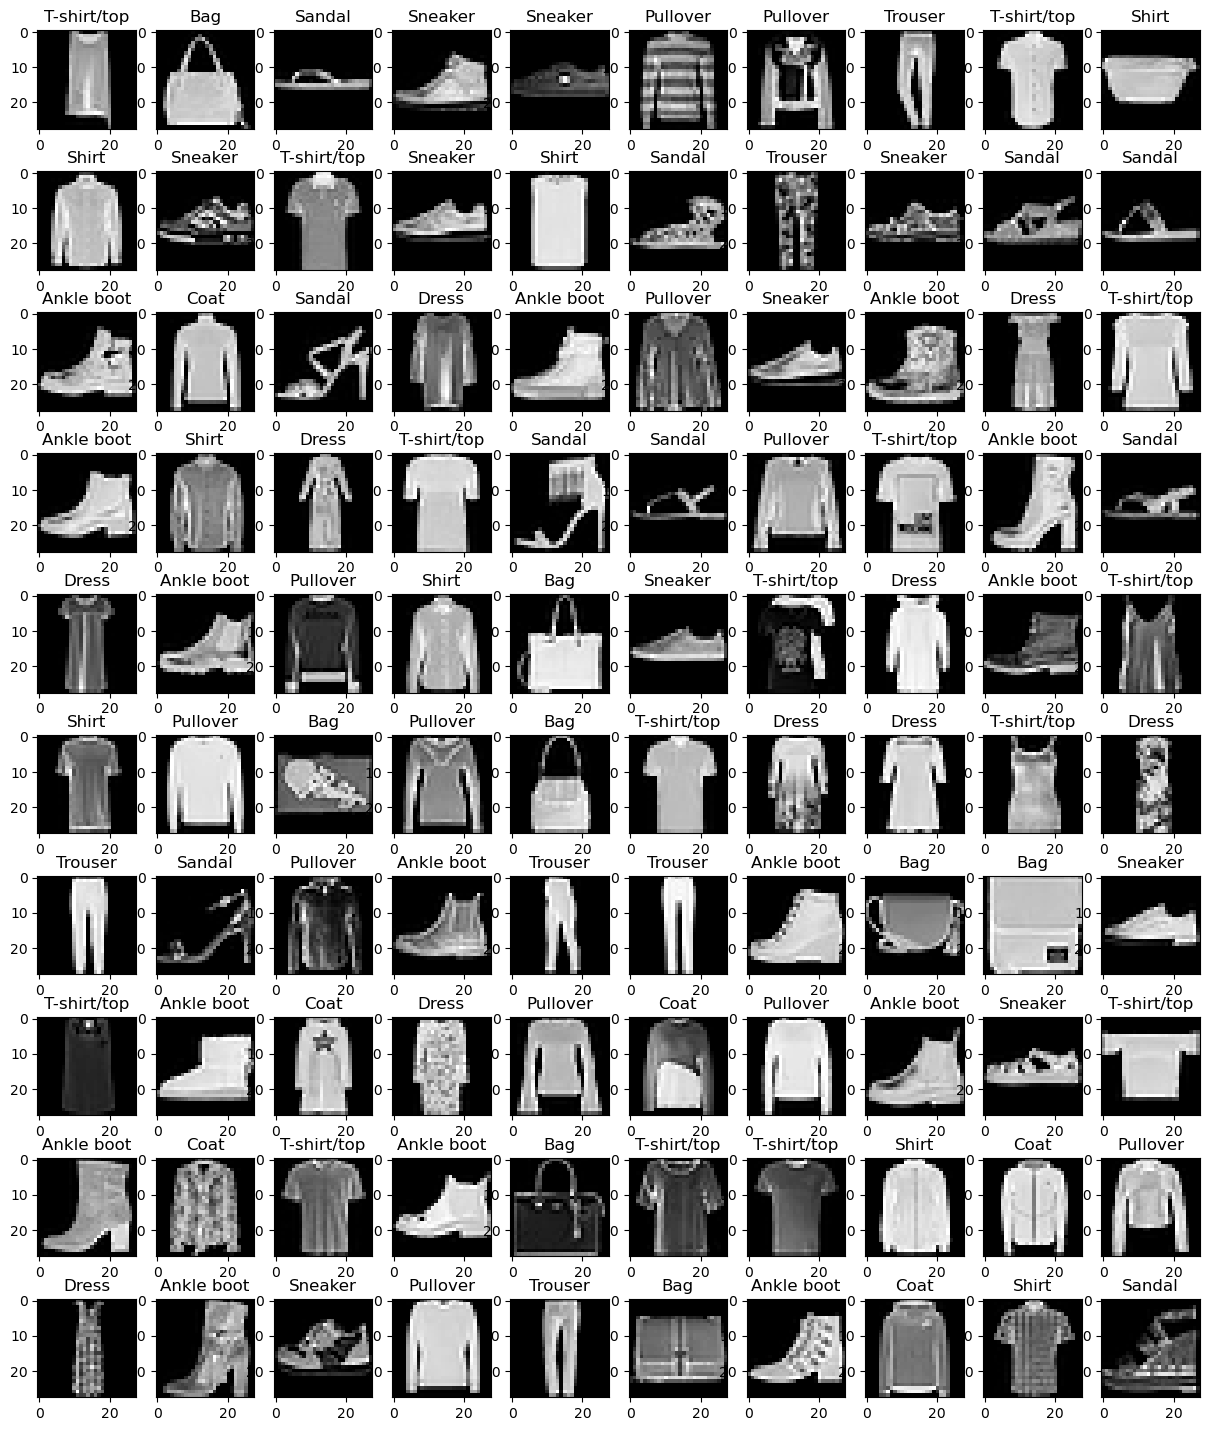

In [377]:

#打印部分预测结果
plt.figure(figsize=(15,18))
pos = 1
for i in range(row):
    for j in range(column):
        plt.subplot(row,column,pos)
        plt.imshow(images[pos-1].numpy().squeeze(),cmap='gray')
        plt.title(classes[predicted[pos-1]])
        pos+=1

(28, 28)
Shirt


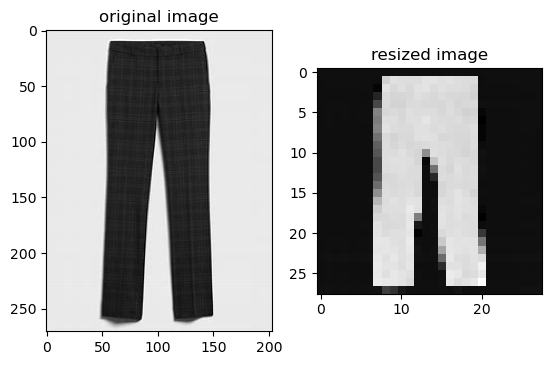

In [378]:
#预测图片
im = cv2.imread('./source/trouser.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
resized_image = cv2.resize(im, (28, 28))
print(resized_image.shape)
#将图片反相
resized_image = 255 - resized_image
#预处理图片
input = transform(resized_image)  
# 把resize后的图片转化为列向量
input = input.view(1, -1)

plt.subplot(1,2,1)
plt.imshow(im, cmap='gray')
plt.title('original image')
plt.subplot(1,2,2)
plt.imshow(resized_image, cmap='gray')
plt.title('resized image')

outputs = clf.predict(input)
predict = outputs[0].astype(int)
print(classes[predict])